## 安裝 Pandas DataReader

In [1]:
! pip install pandas-datareader

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


## 讀取 Google 股價

In [3]:
import pandas_datareader
df = pandas_datareader.get_data_yahoo('goog')

Populating the interactive namespace from numpy and matplotlib


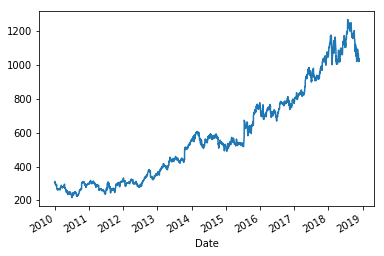

In [6]:
% pylab inline
df['Close'].plot(kind = 'line')

In [8]:
df.count()

High         2241
Low          2241
Open         2241
Close        2241
Volume       2241
Adj Close    2241
dtype: int64

In [10]:
2241 * 0.7

1568.6999999999998

In [11]:
trainset = df.iloc[0:1570,:]
testset  = df.iloc[1570: ,:]

In [15]:
training_set = trainset.iloc[:,3:4].values

In [20]:
#training_set

In [17]:
test_set = testset.iloc[:,3:4].values

In [19]:
#test_set

## 資料標準化

In [21]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [23]:
training_set

array([[307.98684692],
       [311.34997559],
       [309.97888184],
       ...,
       [735.29998779],
       [733.5300293 ],
       [744.77001953]])

In [24]:
training_set_scaled

array([[0.16315187],
       [0.16915774],
       [0.16670924],
       ...,
       [0.92624659],
       [0.9230858 ],
       [0.94315815]])

In [25]:
len(training_set_scaled)

1570

## 建立特徵X與目標y

In [26]:
import numpy as np

X_train = []
y_train = []

for i in range(60, 1570):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i,0])


In [28]:
X_train[0]

array([0.16315187, 0.16915774, 0.16670924, 0.1527547 , 0.14019297,
       0.14721905, 0.14641177, 0.13698156, 0.13397418, 0.13642268,
       0.12768444, 0.13444439, 0.12804816, 0.13032809, 0.10107944,
       0.09219929, 0.09434613, 0.09406225, 0.08713379, 0.08327477,
       0.08600715, 0.08432162, 0.09292673, 0.08047143, 0.08447242,
       0.08640634, 0.08904112, 0.08727575, 0.08900564, 0.08609587,
       0.09335258, 0.09061132, 0.09505586, 0.09287354, 0.09468326,
       0.08782575, 0.0846321 , 0.08016096, 0.0804892 , 0.08571438,
       0.09313965, 0.09691883, 0.1051425 , 0.11367671, 0.11214198,
       0.11011045, 0.12453515, 0.12869576, 0.12727635, 0.11276293,
       0.11455494, 0.1148743 , 0.11561951, 0.10994189, 0.10772408,
       0.10018344, 0.10757323, 0.11249682, 0.11232826, 0.11211533])

In [29]:
y_train[0]

0.11589451009798751

In [30]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [31]:
X_train.shape

(1510, 60)

In [32]:
y_train.shape

(1510,)

In [33]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [35]:
X_train.shape

(1510, 60, 1)

In [36]:
X_train.shape[1], 1

(60, 1)

## 建構LSTM模型

In [37]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True)) 
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True)) 
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

C:\ProgramData\Anaconda3_2\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## 訓練模型

In [38]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1510/1510 [==============================] - 6s 4ms/step - loss: 0.0299
Epoch 2/100
1510/1510 [==============================] - 4s 2ms/step - loss: 0.0040
Epoch 3/100
1510/1510 [==============================] - 4s 2ms/step - loss: 0.0037
Epoch 4/100
1510/1510 [==============================] - 4s 2ms/step - loss: 0.0035
Epoch 5/100
1510/1510 [==============================] - 4s 2ms/step - loss: 0.0028
Epoch 6/100
1510/1510 [==============================] - 4s 3ms/step - loss: 0.0030
Epoch 7/100
1510/1510 [==============================] - 4s 2ms/step - loss: 0.0034
Epoch 8/100
1510/1510 [==============================] - 4s 2ms/step - loss: 0.0033
Epoch 9/100
1510/1510 [==============================] - 4s 2ms/step - loss: 0.0028
Epoch 10/100
1510/1510 [==============================] - 4s 2ms/step - loss: 0.0028
Epoch 11/100
1510/1510 [==============================] - 4s 2ms/step - loss: 0.0028
Epoch 12/100
1510/1510 [==============================] - 4s 3ms/step - lo

In [41]:
#X_train

In [42]:
predicted = regressor.predict(X_train)

In [43]:
predicted

array([[0.11475463],
       [0.116954  ],
       [0.1187714 ],
       ...,
       [0.90822864],
       [0.906258  ],
       [0.90378845]], dtype=float32)

## 反標準化預測結果

In [45]:
predicted_stock_price = sc.inverse_transform(predicted)

In [48]:
training_set.shape, predicted_stock_price.shape

((1570, 1), (1510, 1))

In [50]:
training_set[60:].shape

(1510, 1)

## 對照預測結果與實際結果

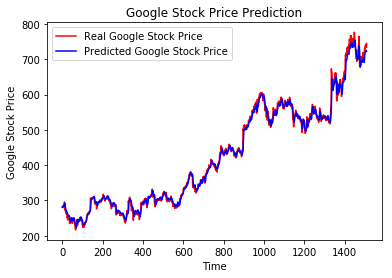

In [51]:
import matplotlib.pyplot as plt
plt.plot(training_set[60:], color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [53]:
training_set[60:][0],predicted_stock_price[0]

(array([281.5239563]), array([280.88565], dtype=float32))

In [55]:
real_data      = training_set[60:].flatten()
predicted_data = predicted_stock_price.flatten()

In [60]:
import numpy as np
(np.abs((real_data - predicted_data) / predicted_data)).mean()

0.017293337609240282

## 評估測試資料集

In [62]:
test_set.shape

(671, 1)

In [63]:
inputs = sc.transform(test_set)

In [65]:
len(inputs)

671

In [66]:
X_test = []
for i in range(60, 671):
    X_test.append(inputs[i-60:i, 0])

In [68]:
X_test = np.array(X_test)
X_test.shape

(611, 60)

In [69]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(611, 60, 1)

In [70]:
test_predicted = regressor.predict(X_test)

In [72]:
test_predicted_stock_price = sc.inverse_transform(test_predicted)

In [74]:
#test_predicted_stock_price

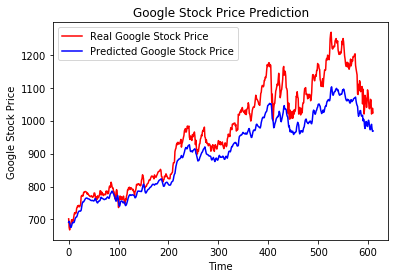

In [75]:
import matplotlib.pyplot as plt
plt.plot(test_set[60:], color = 'red', label = 'Real Google Stock Price')
plt.plot(test_predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

## 抓取Marvel 電影清單

In [80]:
import requests
from bs4 import BeautifulSoup
res = requests.get('https://www.imdb.com/list/ls071217506/')
soup = BeautifulSoup(res.text, 'lxml')
movies = []
for movie in soup.select('.lister-item-header a'):
    movies.append(movie.get('href').split('/')[2])

In [88]:
len(movies)

34

In [85]:
def getMovieReviews(movieid):
    reviews = []
    res = requests.get('https://www.imdb.com/title/{}/reviews?spoiler=hide&sort=helpfulnessScore&dir=desc&ratingFilter=10'.format(movieid))
    soup = BeautifulSoup(res.text, 'lxml')
    for review in soup.select('.imdb-user-review'):
        star = soup.select_one('.rating-other-user-rating span')
        if star and star.text == '10':
            title  = review.select_one('.title').text
            author = review.select_one('.display-name-link').text
            dt     = review.select_one('.review-date').text
            content= review.select_one('.content .text').text
            reviews.append({'title':title, 'author':author, 'dt':dt, 'content':content})
    return reviews

In [86]:
reviews = getMovieReviews('tt0371746')

In [89]:
reviews = []
for movie in movies:
    reviews.extend(getMovieReviews(movie))

In [90]:
import pandas
df = pandas.DataFrame(reviews)

In [94]:
df.to_csv('movie_review.csv', encoding='utf-8-sig')

## 讀取數據

In [95]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/movie_review.csv', index_col= 0)

In [97]:
reviews = ''.join([' <SOR> '+ele+' <EOR> ' for ele in df['content'].tolist()]).lower()
len(reviews)

853576

In [99]:
reviews[0:100]

' <sor> iron man is the best bad-ass action mcu movie definitely my favorite in the marvel comic book'

In [100]:
maxlen = 60
step = 3

sentences = []
next_chars = []

for i in range(0, len(reviews) - maxlen, step):
    sentences.append(reviews[i: i + maxlen])
    next_chars.append(reviews[i + maxlen])

In [103]:
sentences[0], next_chars[0]

(' <sor> iron man is the best bad-ass action mcu movie definit', 'e')

In [104]:
sentences[1], next_chars[1]

('or> iron man is the best bad-ass action mcu movie definitely', ' ')

In [110]:
len(list(set(reviews.split())))

17023

In [105]:
chars = sorted(list(set(reviews)))

In [108]:
#chars

In [111]:
len(chars)

86

In [112]:
char_indices = dict((char, chars.index(char)) for char in chars)

In [114]:
#char_indices

In [115]:
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)

x.shape

(284506, 60, 86)

In [116]:
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
y.shape

(284506, 86)

In [117]:
for i, sentence in enumerate(sentences):        
    for t, char in enumerate(sentence):         
        x[i, t, char_indices[char]] = 1         
    y[i, char_indices[next_chars[i]]] = 1

In [122]:
sentence[0]

'c'

In [123]:
char_indices['c']

39

In [124]:
x[0]

array([[False, False,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [126]:
import keras
from keras import layers

model = keras.models.Sequential()
model.add(layers.LSTM(128,input_shape=(maxlen, len(chars))))
model.add(layers.Dense(len(chars), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [127]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('imdb2.hdf5', monitor='loss', verbose=1, save_best_only=True)

In [129]:
#history = model.fit(x, y, batch_size=128, epochs=15, callbacks=[checkpoint])

## 利用LSTM產生文字

In [137]:
chars = [' ', '!', '"', '#', '$', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '8', '9', ':', ';', '<', '>', '?', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '\x85']
char_indices = dict((char, chars.index(char)) for char in chars)

In [138]:
from keras.models import load_model
model = load_model("imdb.hdf5")

C:\ProgramData\Anaconda3_2\lib\site-packages\keras\engine\saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [139]:
import numpy as np
def softmax(x, t):
    return np.exp(x/t) / np.sum(np.exp(x/t))
x = np.array([0.3,0.5,0.8,0.9])
softmax(x, 0.5)

array([0.11723022, 0.17488694, 0.31866479, 0.38921805])

In [140]:
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [ ]:
def random_reviews(temperature):
    generated_text =  'rest assured, iron man is an absolutely amazing movie. i won'
    generated_text  = generated_text[0:60]
    
    for i in range(600):
        sampled = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(generated_text):
            sampled[0, t, char_indices[char]] = 1
            
        preds = model.predict(sampled, verbose=0)[0]
        next_index = sample(preds, temperature)
        next_char = chars[next_index]
        generated_text += next_char
        generated_text = generated_text[1:]
        
        sys.stdout.write(next_char)
        sys.stdout.flush()
    print(generated_text)

In [143]:
random_reviews(1)

dyont out some of the man cgongerice wanct in the bicin and vinlo and werouth mans as tormenved the ald th sears je.fighfer s-ment and graatgring this maruster. thaperss perffarcact on i war'  <sor>  <sor>  <sor> iron man s moxss man styon, and that wast not all fill from the ally strppodatwed we's abrighimalle......fig sume to (ssey nd gontt to perfest thould becourmor ever stark's suis ros! whing. i manes thon's as him chars out wark nt great......iw's yoo bush they here some diewnat and pronabote firstrare and griaglesce soms and noult for the sere hide become the and sheyan you sinll whinkoult for the sere hide become the and sheyan you sinll whink


## Pre-Trained Model
- https://github.com/Tony607/Yelp_review_generation/releases/download/V0.1/pre-trained.hdf5

In [144]:
#https://github.com/Tony607/Yelp_review_generation/releases/download/V0.1/pre-trained.hdf5

In [147]:
chars=['\n', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~']

# Dictionary mapping unique characters to their index in `chars`
char_indices = dict((char, chars.index(char)) for char in chars)

In [148]:
from keras.models import load_model
model = load_model("pre-trained.hdf5")

C:\ProgramData\Anaconda3_2\lib\site-packages\keras\engine\saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [150]:
random_reviews(0.5)

't 

C:\ProgramData\Anaconda3_2\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


go here anyway... The staff is really friendly and the food is delicious. the service is also great!  Highly recommend this place and will definitely be back!<EOR>"
"<SOR>The best chicken cheese steak ever. And the service was great. The chef came out to see from the menu and were so friendly and cared for. The staff was very friendly and attentive. I would definitely go back and recommend this place.<EOR>"
"<SOR>Best fast food place in town. The food is always fresh and flavorful. The service is always good and the food is always consistent. I highly recommend the dinner list. The best placonsistent. I highly recommend the dinner list. The best pla


## Generate Music With LSTM
- https://towardsdatascience.com/how-to-generate-music-using-a-lstm-neural-network-in-keras-68786834d4c

## 多變量預測

In [1]:
from pandas import read_csv
from datetime import datetime

def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')

dataset = read_csv('https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/pollution.csv',  parse_dates = [['year', 'month', 'day', 'hour']], index_col=0, date_parser=parse)
dataset.head()

,No,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
year_month_day_hour,,,,,,,,,
2010-01-01 00:00:00,1,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,2,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,3,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,4,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,5,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [2]:

dataset.drop('No', axis=1, inplace=True)
dataset.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
dataset.index.name = 'date'
dataset['pollution'].fillna(0, inplace=True)


In [42]:
dataset.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [4]:
dataset = dataset[24:]
dataset.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3_2\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


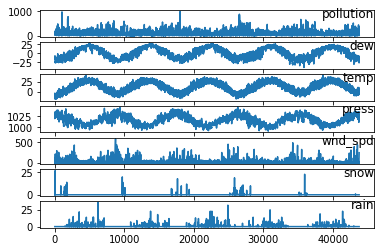

In [5]:
%pylab inline
from matplotlib import pyplot
values = dataset.values

groups = [0, 1, 2, 3, 5, 6, 7]
i = 1

pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

In [9]:
#dataset['pollution'].shift(1)

In [11]:
#dataset

In [12]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
values = values.astype('float32')

In [14]:
values.shape

(43800, 8)

In [17]:
import pandas
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pandas.DataFrame(data)
	cols, names = list(), list()
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pandas.concat(cols, axis=1)
	agg.columns = names
    
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [18]:
from sklearn.preprocessing import MinMaxScaler
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

In [21]:
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t)
1,0.129779,0.352941,0.245902,0.527273,0.666667,0.002290,0.000000,0.0,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.000000,0.0
2,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.000000,0.0,0.159960,0.426471,0.229508,0.545454,0.666667,0.005332,0.000000,0.0
3,0.159960,0.426471,0.229508,0.545454,0.666667,0.005332,0.000000,0.0,0.182093,0.485294,0.229508,0.563637,0.666667,0.008391,0.037037,0.0
4,0.182093,0.485294,0.229508,0.563637,0.666667,0.008391,0.037037,0.0,0.138833,0.485294,0.229508,0.563637,0.666667,0.009912,0.074074,0.0
5,0.138833,0.485294,0.229508,0.563637,0.666667,0.009912,0.074074,0.0,0.109658,0.485294,0.213115,0.563637,0.666667,0.011433,0.111111,0.0


In [24]:
dataset.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [22]:
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t)
1,0.129779,0.352941,0.245902,0.527273,0.666667,0.002290,0.000000,0.0,0.148893
2,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.000000,0.0,0.159960
3,0.159960,0.426471,0.229508,0.545454,0.666667,0.005332,0.000000,0.0,0.182093
4,0.182093,0.485294,0.229508,0.563637,0.666667,0.008391,0.037037,0.0,0.138833
5,0.138833,0.485294,0.229508,0.563637,0.666667,0.009912,0.074074,0.0,0.109658


In [25]:
reframed.count()

var1(t-1)    43799
var2(t-1)    43799
var3(t-1)    43799
var4(t-1)    43799
var5(t-1)    43799
var6(t-1)    43799
var7(t-1)    43799
var8(t-1)    43799
var1(t)      43799
dtype: int64

In [26]:
365 * 24

8760

In [27]:
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test  = values[n_train_hours:, :]
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X  = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((8760, 1, 8), (8760,), (35039, 1, 8), (35039,))

In [28]:
train_X.shape[1], train_X.shape[2]

(1, 8)

In [29]:
import keras
from keras import layers

model = keras.models.Sequential()
model.add(layers.LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(layers.Dense(1))
model.compile(loss='mae', optimizer='adam')

C:\ProgramData\Anaconda3_2\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [30]:
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Train on 8760 samples, validate on 35039 samples
Epoch 1/50
 - 1s - loss: 0.0527 - val_loss: 0.0483
Epoch 2/50
 - 0s - loss: 0.0342 - val_loss: 0.0481
Epoch 3/50
 - 0s - loss: 0.0201 - val_loss: 0.0456
Epoch 4/50
 - 0s - loss: 0.0168 - val_loss: 0.0358
Epoch 5/50
 - 0s - loss: 0.0155 - val_loss: 0.0246
Epoch 6/50
 - 0s - loss: 0.0150 - val_loss: 0.0203
Epoch 7/50
 - 0s - loss: 0.0148 - val_loss: 0.0184
Epoch 8/50
 - 0s - loss: 0.0148 - val_loss: 0.0170
Epoch 9/50
 - 0s - loss: 0.0147 - val_loss: 0.0161
Epoch 10/50
 - 0s - loss: 0.0147 - val_loss: 0.0161
Epoch 11/50
 - 0s - loss: 0.0146 - val_loss: 0.0154
Epoch 12/50
 - 0s - loss: 0.0145 - val_loss: 0.0160
Epoch 13/50
 - 0s - loss: 0.0147 - val_loss: 0.0153
Epoch 14/50
 - 0s - loss: 0.0146 - val_loss: 0.0154
Epoch 15/50
 - 0s - loss: 0.0146 - val_loss: 0.0149
Epoch 16/50
 - 0s - loss: 0.0146 - val_loss: 0.0149
Epoch 17/50
 - 0s - loss: 0.0146 - val_loss: 0.0147
Epoch 18/50
 - 0s - loss: 0.0145 - val_loss: 0.0143
Epoch 19/50
 - 0s - loss

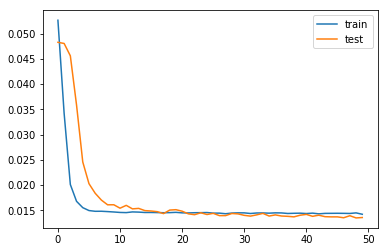

In [31]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [32]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

In [33]:
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [34]:
inv_y

array([31., 20., 19., ..., 10.,  8., 12.], dtype=float32)

In [38]:
inv_yhat

array([35.281757 , 31.898232 , 21.241608 , ...,  7.857461 ,  7.8200593,
        6.0833106], dtype=float32)

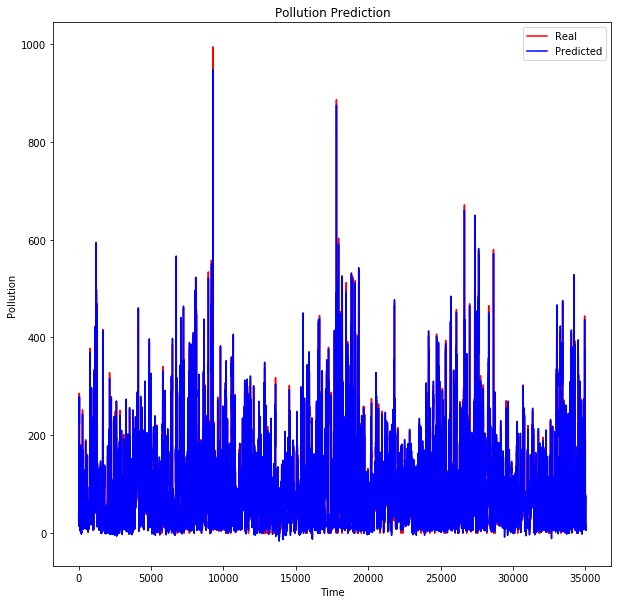

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=[10,10])
plt.plot(inv_y   , color = 'red', label = 'Real')
plt.plot(inv_yhat, color = 'blue', label = 'Predicted')
plt.title('Pollution Prediction')
plt.xlabel('Time')
plt.ylabel('Pollution')
plt.legend()
plt.show()

In [43]:
# calculate RMSE
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 26.558
